/var/folders/63/4wnfmmfj2cn8xyjqyr1y8xzw0000gn/T/ipykernel_62399/2625867399.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


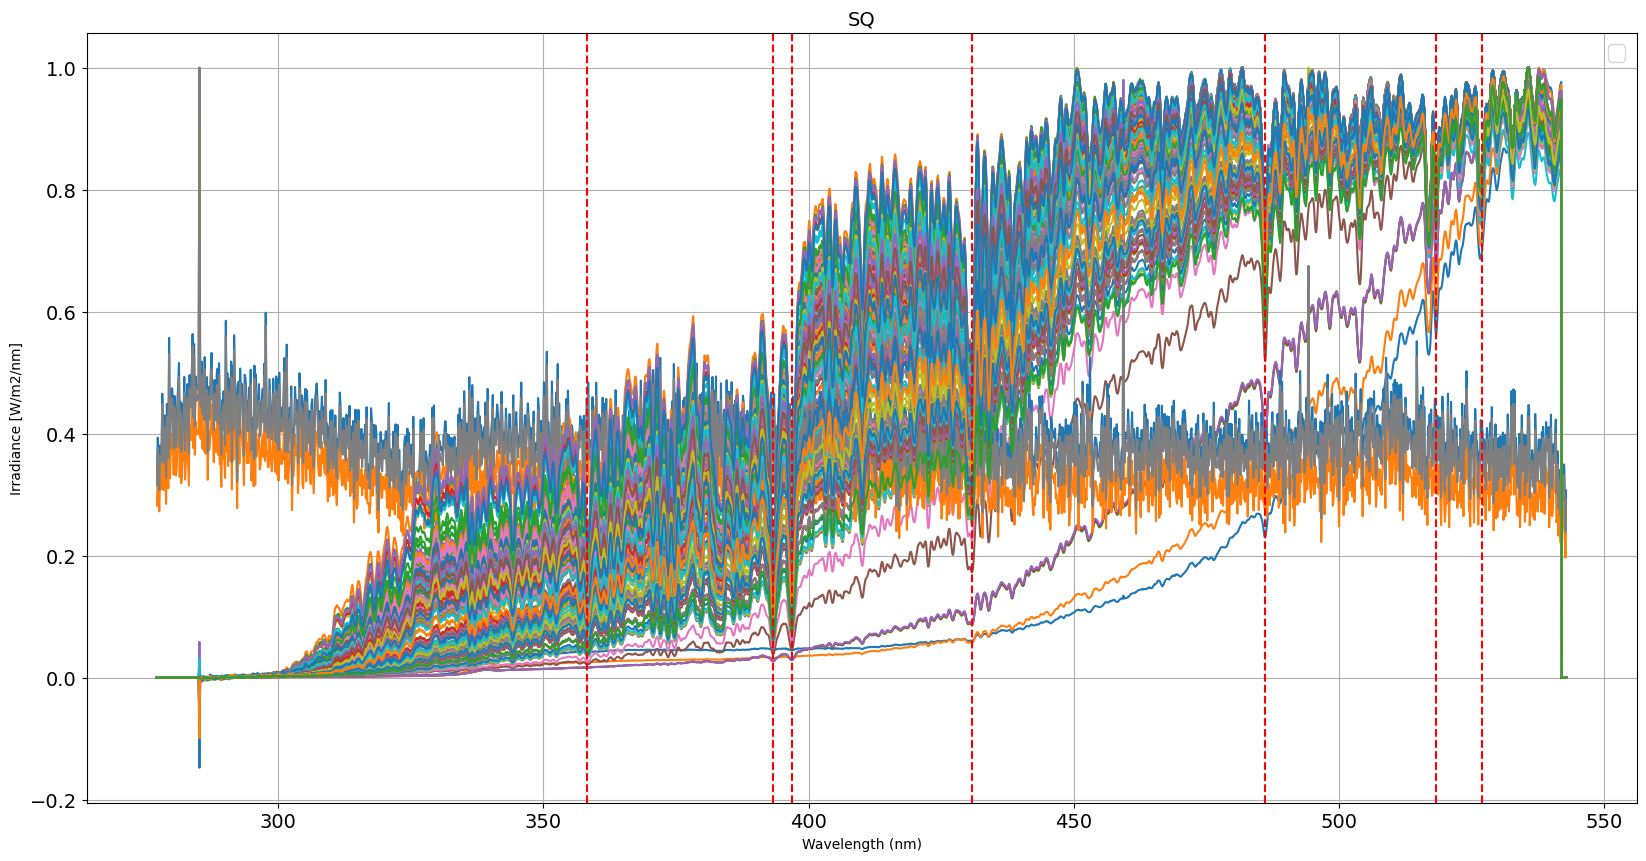

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File path and name
file_path = '/Users/muntasirmahmud/Library/CloudStorage/OneDrive-UMBC/4. SciGlob/Pandora_2_L0/Pandora2s1_GreenbeltMD_20240623_L1_smca1c9d20220412p1-8.txt'

base_name = os.path.basename(file_path)

# Read the entire file
with open(file_path, 'r', encoding='latin1') as file:
    lines = file.readlines()

# Extract the line containing the nominal wavelengths
nominal_wavelengths_line = lines[22].strip()  # Line 23 in the file (index 22)

# Split the line into individual wavelengths and convert them to float
wavelength = np.array([float(value) for value in nominal_wavelengths_line.split(': ')[1].split()])

# Skip the initial 89 rows
data_lines = lines[89:]

# Process each line to split into rows and columns
data_list = []
for line in data_lines:
    # Strip the newline character and split by tabs
    rows = line.strip().split('\t')
    for row in rows:
        # Split each row by spaces
        columns = row.split()
        data_list.append(columns)

# Convert the list of lists into a DataFrame
data1 = pd.DataFrame(data_list)

# Convert the necessary columns to numeric before saving
data1.iloc[:, 2:6205] = data1.iloc[:, 2:6205].apply(pd.to_numeric, errors='coerce')

# Define the conditions
conditions = {
    "SQ_wv": (data1[0] == "SQ")
}

# Create variables for filtered data
filtered_data = {key: data1.loc[condition, 61:2108] for key, condition in conditions.items()}

# Extract the data and calculate the mean
SQ_ = filtered_data["SQ_wv"].reset_index(drop=True)

#SQ_ = SQ_.drop([350, 371, 377]).reset_index(drop=True)

# Function to normalize
def normalize(data):
    return (data / np.max(data))

spectrometer_intensities = []
for j in range(len(SQ_)):
    normalized_data = normalize(SQ_.iloc[j, :]).values
    spectrometer_intensities.append(normalized_data)

spectrometer_intensities = np.array(spectrometer_intensities)



# Plot
plt.figure(figsize=(20, 10))
for i in range(len(spectrometer_intensities)):
    plt.plot(wavelength, spectrometer_intensities[i, :]) #label=f'SQ {i}'
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Irradiance [W/m2/nm]')
#plt.xlim(500, 550)
plt.legend(fontsize=16)
plt.title('SQ', fontsize=14)
# Define the x_nm values for the dotted lines
dotted_lines = [358.121, 393.366, 396.847, 430.774, 486.134, 518.362, 527.039] #382.044

# Draw dotted vertical lines at the specified x_nm values
for line in dotted_lines:
    plt.axvline(x=line, color='red', linestyle='--')  # Dotted red lines

plt.show()

/var/folders/63/4wnfmmfj2cn8xyjqyr1y8xzw0000gn/T/ipykernel_51673/1736127849.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


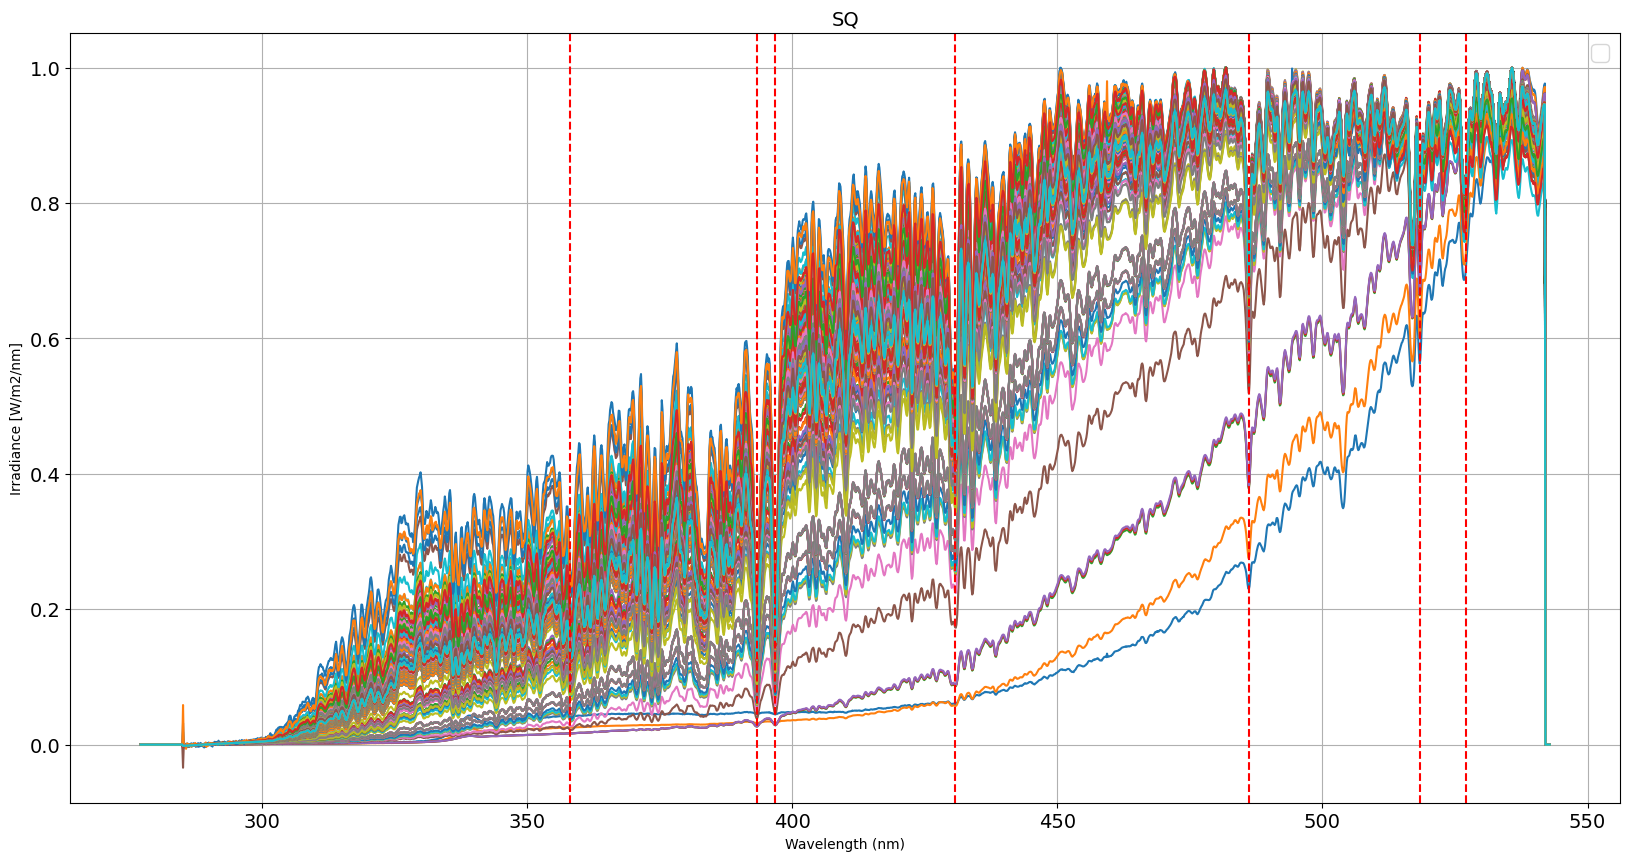

In [4]:
# Plot
plt.figure(figsize=(20, 10))
for i in range(len(spectrometer_intensities)-50):
    plt.plot(wavelength, spectrometer_intensities[i, :])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Irradiance [W/m2/nm]')
#plt.xlim(500, 550)
plt.legend(fontsize=16)
plt.title('SQ', fontsize=14)
# Define the x_nm values for the dotted lines
dotted_lines = [358.121, 393.366, 396.847, 430.774, 486.134, 518.362, 527.039] #382.044

# Draw dotted vertical lines at the specified x_nm values
for line in dotted_lines:
    plt.axvline(x=line, color='red', linestyle='--')  # Dotted red lines

plt.show()

In [32]:
print(SQ_.iloc[350,:]) 371, 377

61      2749
62      3297
63      3123
64      2682
65      3188
        ... 
2104    2929
2105    2918
2106    2370
2107    2103
2108    2572
Name: 350, Length: 2048, dtype: object
